In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def simulate_brownian_motion (T=1, N=1000, M=10000):
    dt = T / N
    t = np.linspace (0, T, N+1)
    dB = np.sqrt(dt) * np.random.randn(M, N)
    B = np.cumsum(dB, axis = 1)
    B = np.hstack((np.zeros((M, 1)), B))
    return t, B

def empirical_reflection_principale (t, B, b):
    B_t = B[:, -1]
    max_B = np.max(B, axis = 1)
    p_sup = np.mean(max_B >= b)
    p_Bt = np.mean(B_t >= b)

    print(f"P(sup_{{0 <= u <= {t[-1]: .2f}}} B_u ≥ {b}) = {p_sup: .4f}")
    print(f"P(B_{t[-1]: .2f} >= {b}) = {p_Bt: .4f}")
    print(f"D'après la reflection principale")
    print(f"P(sup >= b) ≈ 2 * P(B_t >= b) = {2*p_Bt: .4f}")
    return B_t, max_B

b = 1.0
t, B = simulate_brownian_motion()
B_t, max_B = empirical_reflection_principale(t, B, b=1.0)

P(sup_{0 <= u <=  1.00} B_u ≥ 1.0) =  0.3103
P(B_ 1.00 >= 1.0) =  0.1611
D'après la reflection principale
P(sup >= b) ≈ 2 * P(B_t >= b) =  0.3222


In [35]:
x_values = np.linspace(np.min(B_t), np.max(B_t), 1000)
cdf_max = np.array([np.mean(max_B <= x) for x in x_values])
cdf_Bt = np.array([np.mean(B_t <= x) for x in x_values])

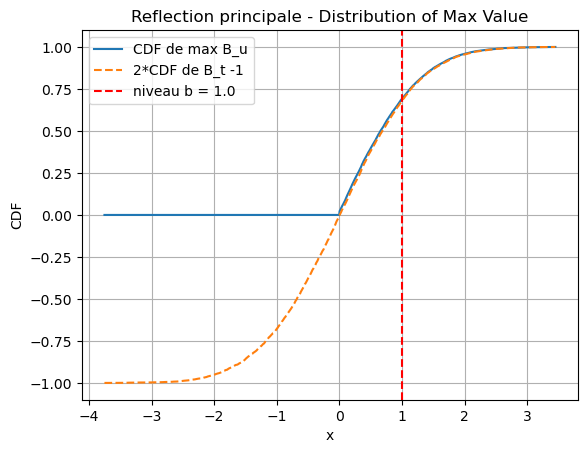

In [37]:
plt.plot(x_values, cdf_max, label = 'CDF de max B_u')
plt.plot(x_values, 2*cdf_Bt -1, label = '2*CDF de B_t -1', linestyle='--')
plt.axvline(b, color='red', linestyle='--', label=f'niveau b = {b}')
plt.title('Reflection principale - Distribution of Max Value')
plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()